In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Microarray data clustering

Rosenwald, Andreas, et al. "The use of molecular profiling to predict survival after chemotherapy for diffuse large-B-cell lymphoma." New England Journal of Medicine 346.25 (2002): 1937-1947.

http://www.nejm.org/doi/full/10.1056/NEJMoa012914#t=article  
"Hierarchical clustering was used to define subgroups of diffuse large-B-cell lymphoma."

Data:  
http://llmpp.nih.gov/DLBCL/

In [2]:
import pandas as pd

In [5]:
def RedBlackGreen():
    cdict = {'red':   ((0.0, 0.0, 0.0),
                       (0.5, 0.0, 0.1),
                       (0.7, 1.0, 1.0),
                       (1.0, 1.0, 1.0)),
    
             'blue': ((0.0, 0.0, 0.0),
                      (1.0, 0.0, 0.0)),
    
             'green':  ((0.0, 0.0, 1.0),
                        (0.3, 1.0, 1.0),
                       (0.5, 0.1, 0.0),
                       (1.0, 0.0, 0.0))
            }
    
    my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return my_cmap

redblackgreen = RedBlackGreen()

In [6]:
df = pd.read_csv("Fig1A.cdt", sep="\t", index_col=['UNIQID'])
df = df.iloc[2:, 3:-2]

df2 = df.astype(float).fillna(0)
X = df2.values.T

In [7]:
df.shape

(100, 274)

In [8]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist

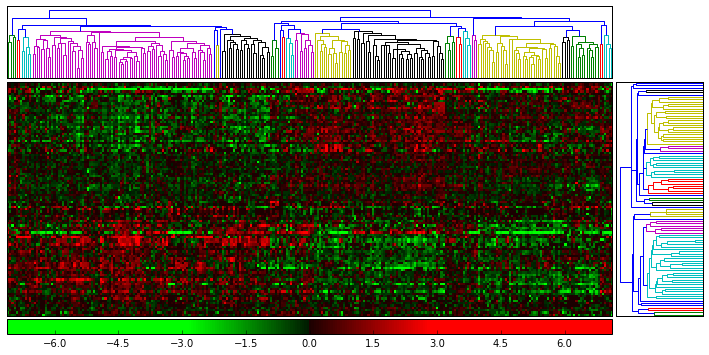

In [9]:
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(12,5))
ax1 = fig.add_axes([0.1,0.71,0.7,0.2])
Y = sch.linkage(dist.pdist(X, 'correlation'), method='average') #le persone  come esempi e i geni come feature
Z1 = sch.dendrogram(Y)
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.805,0.05,0.1,0.65])
Y = sch.linkage(dist.pdist(X.T, 'correlation'), method='average') #traspone i geni come esempi e le presone come feature
Z2 = sch.dendrogram(Y, orientation='left')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.1,0.05,0.7,0.65])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
X = X[idx1,:]
X = X[:,idx2]
norm = plt.cm.colors.Normalize(vmax=abs(X).max(), vmin=-abs(X).max())
im = axmatrix.matshow(X.T, aspect='auto', origin='lower', cmap=redblackgreen, norm=norm)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# # Plot colorbar.
axcolor = fig.add_axes([0.1,0.,0.7,0.04])
pylab.colorbar(im, cax=axcolor, orientation='horizontal');

"Panel A shows the hierarchical clustering of diffuse large-B-cell lymphomas from 240 patients with untreated disease and 34 patients who had previously been treated or who had a preexisting low-grade lymphoma, according to the level of expression of 100 genes. Red areas indicate increased expression, and green areas decreased expression. Each column represents a single diffuse large-B-cell lymphoma, and each row represents a single gene. ..."

In [1]:
import tensorflow